In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
### Extraction ###
# Owner's Sex vs. Average Annual Employee Pay
params="SEX,SEX_LABEL,PAYANN,PAYANN_S,EMP,EMP_S"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"
dataset="abscb"
year=2019
url=f"https://api.census.gov/data/{year}/{dataset}?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
sex_emppay = pd.DataFrame(full_list, columns=headers)


# Owner's Ethnicity vs. Average Annual Employee Pay
params="ETH_GROUP,ETH_GROUP_LABEL,PAYANN,PAYANN_S,EMP,EMP_S"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"
dataset="abscb"
year=2019
url=f"https://api.census.gov/data/{year}/{dataset}?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
eth_emppay = pd.DataFrame(full_list, columns=headers)


# Owner's Veteran Status vs. Average Annual Employee Pay
params="VET_GROUP,VET_GROUP_LABEL,PAYANN,PAYANN_S,EMP,EMP_S"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"
dataset="abscb"
year=2019
url=f"https://api.census.gov/data/{year}/{dataset}?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
vet_emppay = pd.DataFrame(full_list, columns=headers)


# Owner's Race vs. Average Annual Employee Pay
params="RACE_GROUP,RACE_GROUP_LABEL,PAYANN,PAYANN_S,EMP,EMP_S"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"
dataset="abscb"
year=2019
url=f"https://api.census.gov/data/{year}/{dataset}?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
rac_emppay = pd.DataFrame(full_list, columns=headers)


#Owner Number/Family Owned/Spouses vs. Average Annual Employee Pay
params="QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,PAYANN,PAYANN_S,EMP,EMP_S"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"
dataset="abscb"
year=2019
url=f"https://api.census.gov/data/{year}/{dataset}?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
q_emppay = pd.DataFrame(full_list, columns=headers)

In [3]:
### Transformation ###
# Owner's Sex vs. Average Annual Employee Pay
sex_emppay['Average Annual Employee Pay (/$1000))']=pd.to_numeric(sex_emppay['PAYANN'])/pd.to_numeric(sex_emppay['EMP'])
sex_emppay.drop(['PAYANN','EMP','us'],axis=1,inplace=True)
sex_emppay=sex_emppay[~sex_emppay.eq('Total').any(1)]
sex_emppay.set_index('SEX_LABEL',inplace=True)
sex_emppay[:]

# Owner's Ethnicity vs. Average Annual Employee Pay
eth_emppay['Average Annual Employee Pay (/$1000))']=pd.to_numeric(eth_emppay['PAYANN'])/pd.to_numeric(eth_emppay['EMP'])
eth_emppay.drop(['PAYANN','EMP','us'],axis=1,inplace=True)
eth_emppay=eth_emppay[~eth_emppay.eq('Total').any(1)]
eth_emppay.set_index('ETH_GROUP_LABEL',inplace=True)

# Owner's Veteran Status vs. Average Annual Employee Pay
vet_emppay['Average Annual Employee Pay (/$1000))']=pd.to_numeric(vet_emppay['PAYANN'])/pd.to_numeric(vet_emppay['EMP'])
vet_emppay.drop(['PAYANN','EMP','us'],axis=1,inplace=True)
vet_emppay=vet_emppay[~vet_emppay.eq('Total').any(1)]
vet_emppay.set_index('VET_GROUP_LABEL',inplace=True)

# Owner's Race vs. Average Annual Employee Pay
rac_emppay=rac_emppay[rac_emppay['RACE_GROUP'].isin(['90','91','92'])]
rac_emppay['Average Annual Employee Pay (/$1000))']=pd.to_numeric(rac_emppay['PAYANN'])/pd.to_numeric(rac_emppay['EMP'])
rac_emppay.drop(['PAYANN','EMP','us'],axis=1,inplace=True)
rac_emppay=rac_emppay[~rac_emppay.eq('Total').any(1)]
rac_emppay.set_index('RACE_GROUP_LABEL',inplace=True)

#Owner Number/Family Owned/Spouses vs. Average Annual Employee Pay
q_emppay=q_emppay[~q_emppay['BUSCHAR'].isin(['A1','BP','NB','BO','BZ','BY','ME','MF','MD','BX','BQ04'])]
onum_emppay=q_emppay[q_emppay['QDESC']=='B01']
famo_emppay=q_emppay[q_emppay['QDESC']=='B02']
spou_emppay=q_emppay[q_emppay['QDESC']=='B03']

onum_emppay['Average Annual Employee Pay (/$1000))']=pd.to_numeric(onum_emppay['PAYANN'])/pd.to_numeric(onum_emppay['EMP'])
onum_emppay.drop(['PAYANN','EMP','us'],axis=1,inplace=True)
onum_emppay=onum_emppay[~onum_emppay.eq('Total').any(1)]
onum_emppay['BUSCHAR_LABEL']=onum_emppay['BUSCHAR_LABEL'].apply(lambda x: x.replace(' people','').replace(' to ','-').replace(' person','').replace(' or more','+'))
onum_emppay.set_index('BUSCHAR_LABEL',inplace=True)

famo_emppay['Average Annual Employee Pay (/$1000))']=pd.to_numeric(famo_emppay['PAYANN'])/pd.to_numeric(famo_emppay['EMP'])
famo_emppay.drop(['PAYANN','EMP','us'],axis=1,inplace=True)
famo_emppay=famo_emppay[~famo_emppay.eq('Total').any(1)]
famo_emppay.set_index('BUSCHAR_LABEL',inplace=True)


spou_emppay['Average Annual Employee Pay (/$1000))']=pd.to_numeric(spou_emppay['PAYANN'])/pd.to_numeric(spou_emppay['EMP'])
spou_emppay.drop(['PAYANN','EMP','us'],axis=1,inplace=True)
spou_emppay=spou_emppay[~spou_emppay.eq('Total').any(1)]
spou_emppay.set_index('BUSCHAR_LABEL',inplace=True)


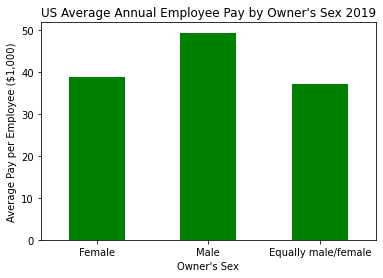

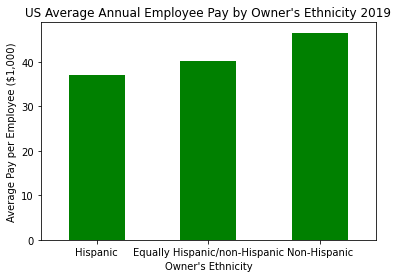

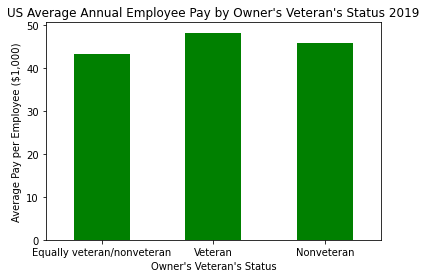

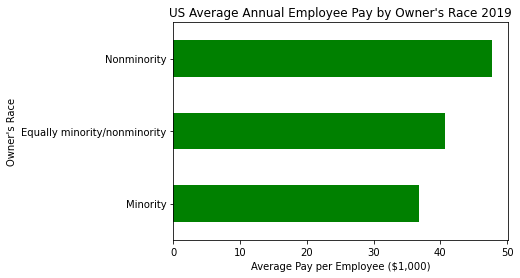

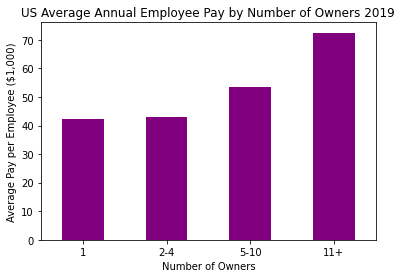

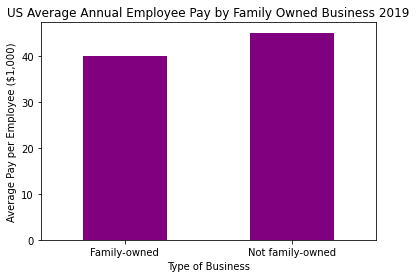

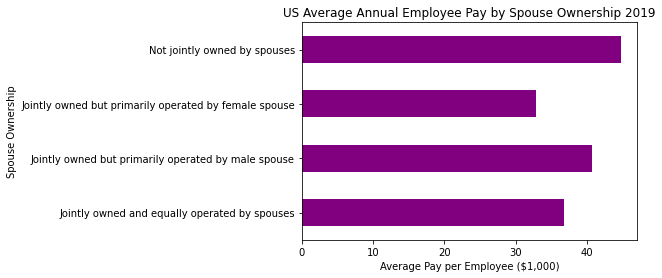

In [4]:
### Visualizations ### 
# Owner's Sex vs. Average Annual Employee Pay
ax1=sex_emppay.plot(title="US Average Annual Employee Pay by Owner's Sex 2019",kind='bar',color='green',legend=None)
ax1.set_xlabel("Owner's Sex")
ax1.set_ylabel('Average Pay per Employee ($1,000)')
plt.xticks(rotation=0)

# Owner's Ethnicity vs. Average Annual Employee Pay
ax2=eth_emppay.plot(title="US Average Annual Employee Pay by Owner's Ethnicity 2019",kind='bar',color='green',legend=None)
ax2.set_xlabel("Owner's Ethnicity")
ax2.set_ylabel('Average Pay per Employee ($1,000)')
plt.xticks(rotation=0)

# Owner's Veteran Status vs. Average Annual Employee Pay
ax3=vet_emppay.plot(title="US Average Annual Employee Pay by Owner's Veteran's Status 2019",kind='bar',color='green',legend=None)
ax3.set_xlabel("Owner's Veteran's Status")
ax3.set_ylabel('Average Pay per Employee ($1,000)')
plt.xticks(rotation=0)

# Owner's Race vs. Average Annual Employee Pay
ax4=rac_emppay.plot(title="US Average Annual Employee Pay by Owner's Race 2019",kind='barh',color='green',legend=None)
ax4.set_ylabel("Owner's Race")
ax4.set_xlabel('Average Pay per Employee ($1,000)')

#Owner Number/Family Owned/Spouses vs. Average Annual Employee Pay
ax5=onum_emppay.plot(title="US Average Annual Employee Pay by Number of Owners 2019",kind='bar',color='purple',legend=None)
ax5.set_xlabel("Number of Owners")
ax5.set_ylabel('Average Pay per Employee ($1,000)')
plt.xticks(rotation=0)

ax6=famo_emppay.plot(title="US Average Annual Employee Pay by Family Owned Business 2019",kind='bar',color='purple',legend=None)
ax6.set_xlabel("Type of Business")
ax6.set_ylabel('Average Pay per Employee ($1,000)')
plt.xticks(rotation=0)

ax7=spou_emppay.plot(title="US Average Annual Employee Pay by Spouse Ownership 2019",kind='barh',color='purple',legend=None)
ax7.set_ylabel("Spouse Ownership")
ax7.set_xlabel('Average Pay per Employee ($1,000)')
plt.show()

In [5]:
### Tables ###
sex_emppay[:]

,SEX,PAYANN_S,EMP_S,Average Annual Employee Pay (/$1000))
SEX_LABEL,,,,
Female,002,1.7,1.5,38.783742
Male,003,1.1,0.7,49.352194
Equally male/female,004,2.0,1.7,37.212073


In [6]:
eth_emppay[:]

,ETH_GROUP,PAYANN_S,EMP_S,Average Annual Employee Pay (/$1000))
ETH_GROUP_LABEL,,,,
Hispanic,020,4.5,3.5,36.974561
Equally Hispanic/non-Hispanic,028,12.6,9.5,40.286008
Non-Hispanic,029,0.9,0.7,46.572335


In [7]:
vet_emppay[:]

,VET_GROUP,PAYANN_S,EMP_S,Average Annual Employee Pay (/$1000))
VET_GROUP_LABEL,,,,
Equally veteran/nonveteran,003,4.3,4.5,43.396354
Veteran,002,3.2,4.2,48.306436
Nonveteran,004,1.0,0.7,46.005396


In [8]:
rac_emppay[:]

,RACE_GROUP,PAYANN_S,EMP_S,Average Annual Employee Pay (/$1000))
RACE_GROUP_LABEL,,,,
Minority,90,1.5,1.4,36.847077
Equally minority/nonminority,91,7.0,5.4,40.742246
Nonminority,92,0.9,0.7,47.775545


In [9]:
onum_emppay[:]

,QDESC,QDESC_LABEL,BUSCHAR,PAYANN_S,EMP_S,Average Annual Employee Pay (/$1000))
BUSCHAR_LABEL,,,,,,
1,B01,OWNRNUM,BQ,2.0,1.5,42.186145
2-4,B01,OWNRNUM,BQ01,2.1,1.5,42.840881
5-10,B01,OWNRNUM,BQ02,4.7,4.7,53.619638
11+,B01,OWNRNUM,BQ03,0.8,0.3,72.475334


In [10]:
famo_emppay[:]

,QDESC,QDESC_LABEL,BUSCHAR,PAYANN_S,EMP_S,Average Annual Employee Pay (/$1000))
BUSCHAR_LABEL,,,,,,
Family-owned,B02,FAMOWN,BM,1.5,1.3,39.892504
Not family-owned,B02,FAMOWN,BN,1.0,0.8,45.015069


In [11]:
spou_emppay[:]

,QDESC,QDESC_LABEL,BUSCHAR,PAYANN_S,EMP_S,Average Annual Employee Pay (/$1000))
BUSCHAR_LABEL,,,,,,
Jointly owned and equally operated by spouses,B03,SPOUSES,LZ,2.4,2.1,36.844910
Jointly owned but primarily operated by male spouse,B03,SPOUSES,MA,3.5,2.9,40.727651
Jointly owned but primarily operated by female spouse,B03,SPOUSES,MB,5.0,3.5,32.921121
Not jointly owned by spouses,B03,SPOUSES,MC,1.0,0.7,44.755838
